In [53]:
import pandas as pd
import numpy as np
from helper import visualize_input, plot_images
from matplotlib import pyplot as plt

## Realizar un clasificador Naive Bayes utilizando la librería sklearn:
http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

Pueden usar cualquiera de las opciones que crean más convenientes dependiendo del problema que elijan:
- BernoulliNB
- GaussianNB
- MultinomialNB

Los datasets a utilizar pueden ser:

1) Toxic Comments:
https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

2) Fashion MNIST:
https://github.com/zalandoresearch/fashion-mnist

3) Alturas y pesos de personas para estimar si es hombre o mujer


## A continuación se muestran como importar los distintos datasets

# Ejemplo para importar dataset alturas y pesos

In [2]:
df = pd.read_csv('alturas-pesos.csv')

In [17]:
alturas = df['Altura'].values
pesos = df['Peso'].values
clases = df['Sexo'].values

In [19]:
print(alturas)

[187 174 188 ..., 162 175 157]


In [21]:
print(pesos)

[109  73  96 ...,  58  74  51]


In [22]:
print(clases)

['Hombre' 'Hombre' 'Hombre' ..., 'Mujer' 'Mujer' 'Mujer']


# Ejempo para importar dataset toxic comments

In [25]:
data_toxic = pd.read_csv("toxic/train.csv")

In [27]:
data_toxic

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [33]:
textos_toxic = data_toxic["comment_text"].fillna("CVxTz").values

In [34]:
print(textos_toxic)

[ "Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...,
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead

In [38]:
list_classes_toxic = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = data_toxic[list_classes_toxic].values

In [41]:
## Me quedo con binario, si es toxico o no
y_binario = y.sum(axis=1)

In [45]:
y_binario

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
# Cantidad de comentarios toxicos
y_binario.sum()

35098

In [49]:
# Cantidad de comentarios no toxicos
len(y_binario) - y_binario.sum()

124473

In [51]:
# Porcentaje de comentarios toxicos
y_binario.sum()/(len(y_binario) - y_binario.sum())

0.28197279731347358

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 20000

vectorizer = CountVectorizer(max_df=0.9, min_df=2,
                                   max_features=max_features,
                                   stop_words='english')

%time count_matrix = vectorizer.fit_transform(textos_toxic)

CPU times: user 9.81 s, sys: 198 ms, total: 10 s
Wall time: 10.1 s


In [63]:
# Notar que esta matriz tiene contidad de comentarios x cantidad de palabras (esta limitada por max_features,
# Se puede modificar para agragar mas palabras o quitar)
count_matrix.shape

(159571, 20000)

# Ejemplo para importar Fashion MNIST

In [54]:
X_fashion = np.load('fashion/train_images.npy')
y_fashion = np.loadtxt('fashion/train_labels.csv', delimiter=',', skiprows=1)

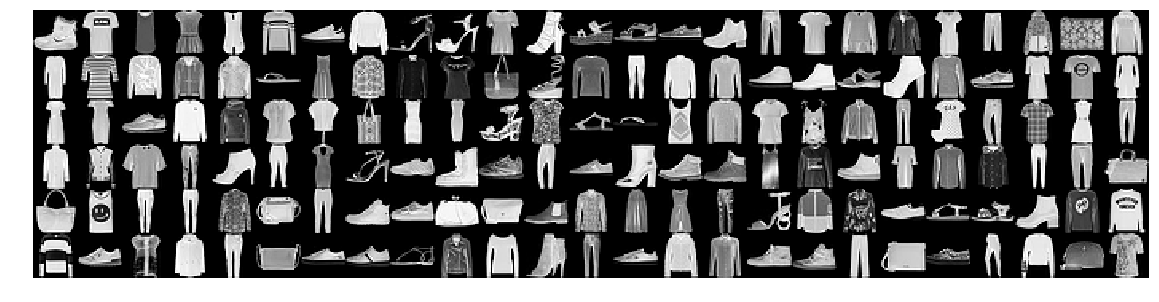

In [56]:
plot_images(X_fashion, 150, 25)

In [64]:
y_fashion

array([ 9.,  0.,  0., ...,  3.,  0.,  5.])

In [65]:
classes_names = {
    0:'T-shirt/top',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}